In [2]:
!pip install librosa -U

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import wave # for reading audio files in .wav format
import pylab # for plotting waveforms and spectrograms
from pathlib import Path
from scipy import signal
from scipy.io import wavfile # wavfile reads wav files and returns the sample rate (in samples/sec) and data as numpy array
from sklearn.metrics import confusion_matrix # for confusion matrix plot
import itertools # itertools is used for efficient looping
from tqdm import tqdm
import librosa #Python package for music & audio files
import librosa.display
import librosa.display as lplt

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alanchn31/free-spoken-digits")

print("Path to dataset files:", path)

100%|██████████| 15.7M/15.7M [00:00<00:00, 133MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/alanchn31/free-spoken-digits/versions/1


In [5]:
# Set paths to input and output data
INPUT_DIR = "/root/.cache/kagglehub/datasets/alanchn31/free-spoken-digits/versions/1/free-spoken-digit-dataset-master"
OUTPUT_DIR = '/content/output'

# Print names of 10 WAV files from the input path
parent_list = os.listdir(INPUT_DIR)
for i in parent_list:
    print(i)

__init__.py
metadata.py
.gitignore
recordings
README.md
utils
acquire_data
pip_requirements.txt


In [6]:
recordings_path =INPUT_DIR+ "/recordings"
if os.path.exists(recordings_path) and os.path.isdir(recordings_path):
    # List all entries in the directory
    recordings = os.listdir(recordings_path)

    # Optionally, sort the list for consistent ordering
    recordings.sort()

    # Get the first 10 records (or all if less than 10)
    first_10 = recordings[:10]

    print("First 10 files in the recordings directory:")
    for record in first_10:
        print(record)
else:
    print("The recordings directory does not exist at:", recordings_path)


First 10 files in the recordings directory:
0_george_0.wav
0_george_1.wav
0_george_10.wav
0_george_11.wav
0_george_12.wav
0_george_13.wav
0_george_14.wav
0_george_15.wav
0_george_16.wav
0_george_17.wav


In [ ]:
audio = recordings_path + "/0_george_0.wav"
#Load & decode the audio as a time series, where sr represents the sampling rate
data , sr = librosa.load(audio)
print(type(data), type(sr))


<class 'numpy.ndarray'> <class 'int'>


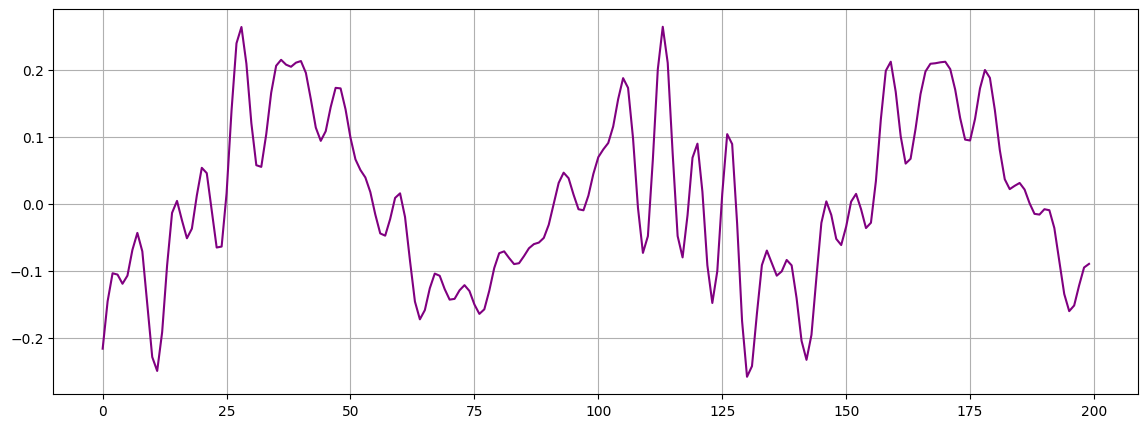

In [ ]:
start = 1000
end = 1200
plt.figure(figsize=(14,5))
plt.plot(data[start:end], color='Purple')
plt.grid()

In [ ]:
zero_cross_rate = librosa.zero_crossings(data[start:end], pad=False)
print("The number of zero crossings is:", sum(zero_cross_rate))

The number of zero crossings is: 24


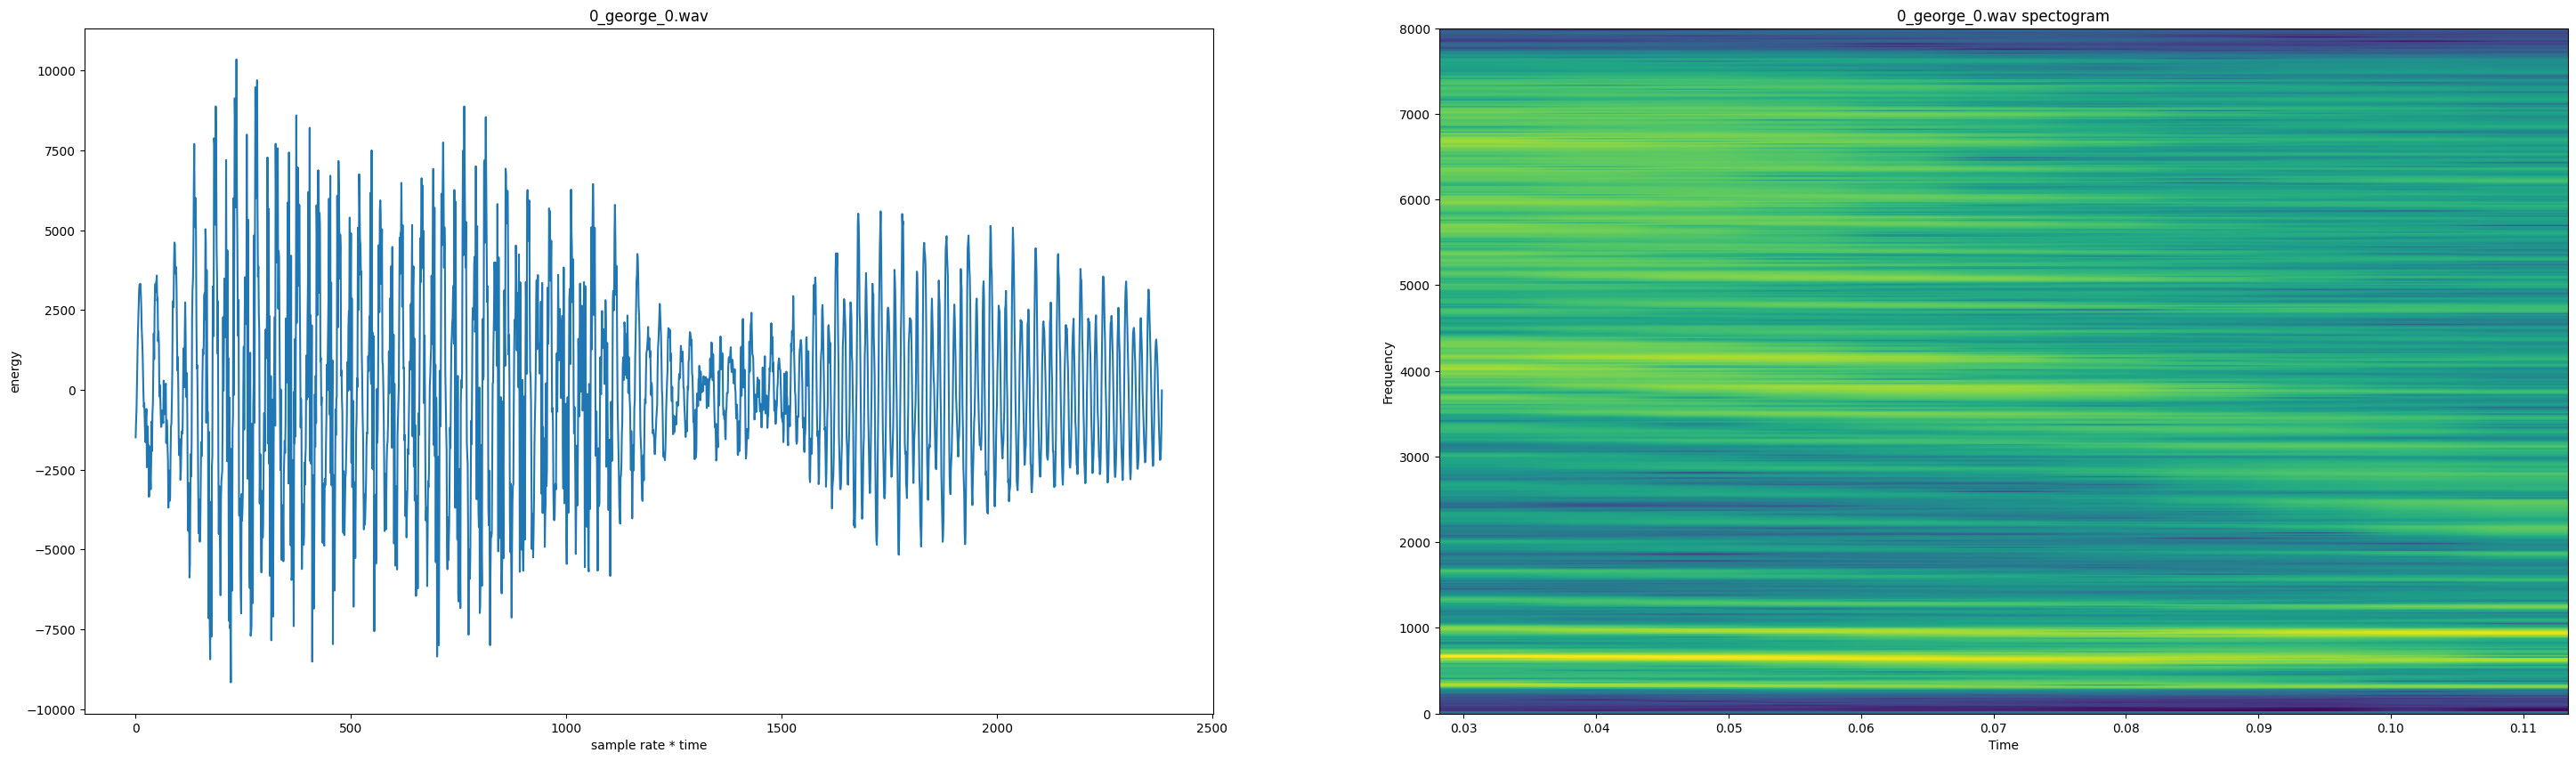

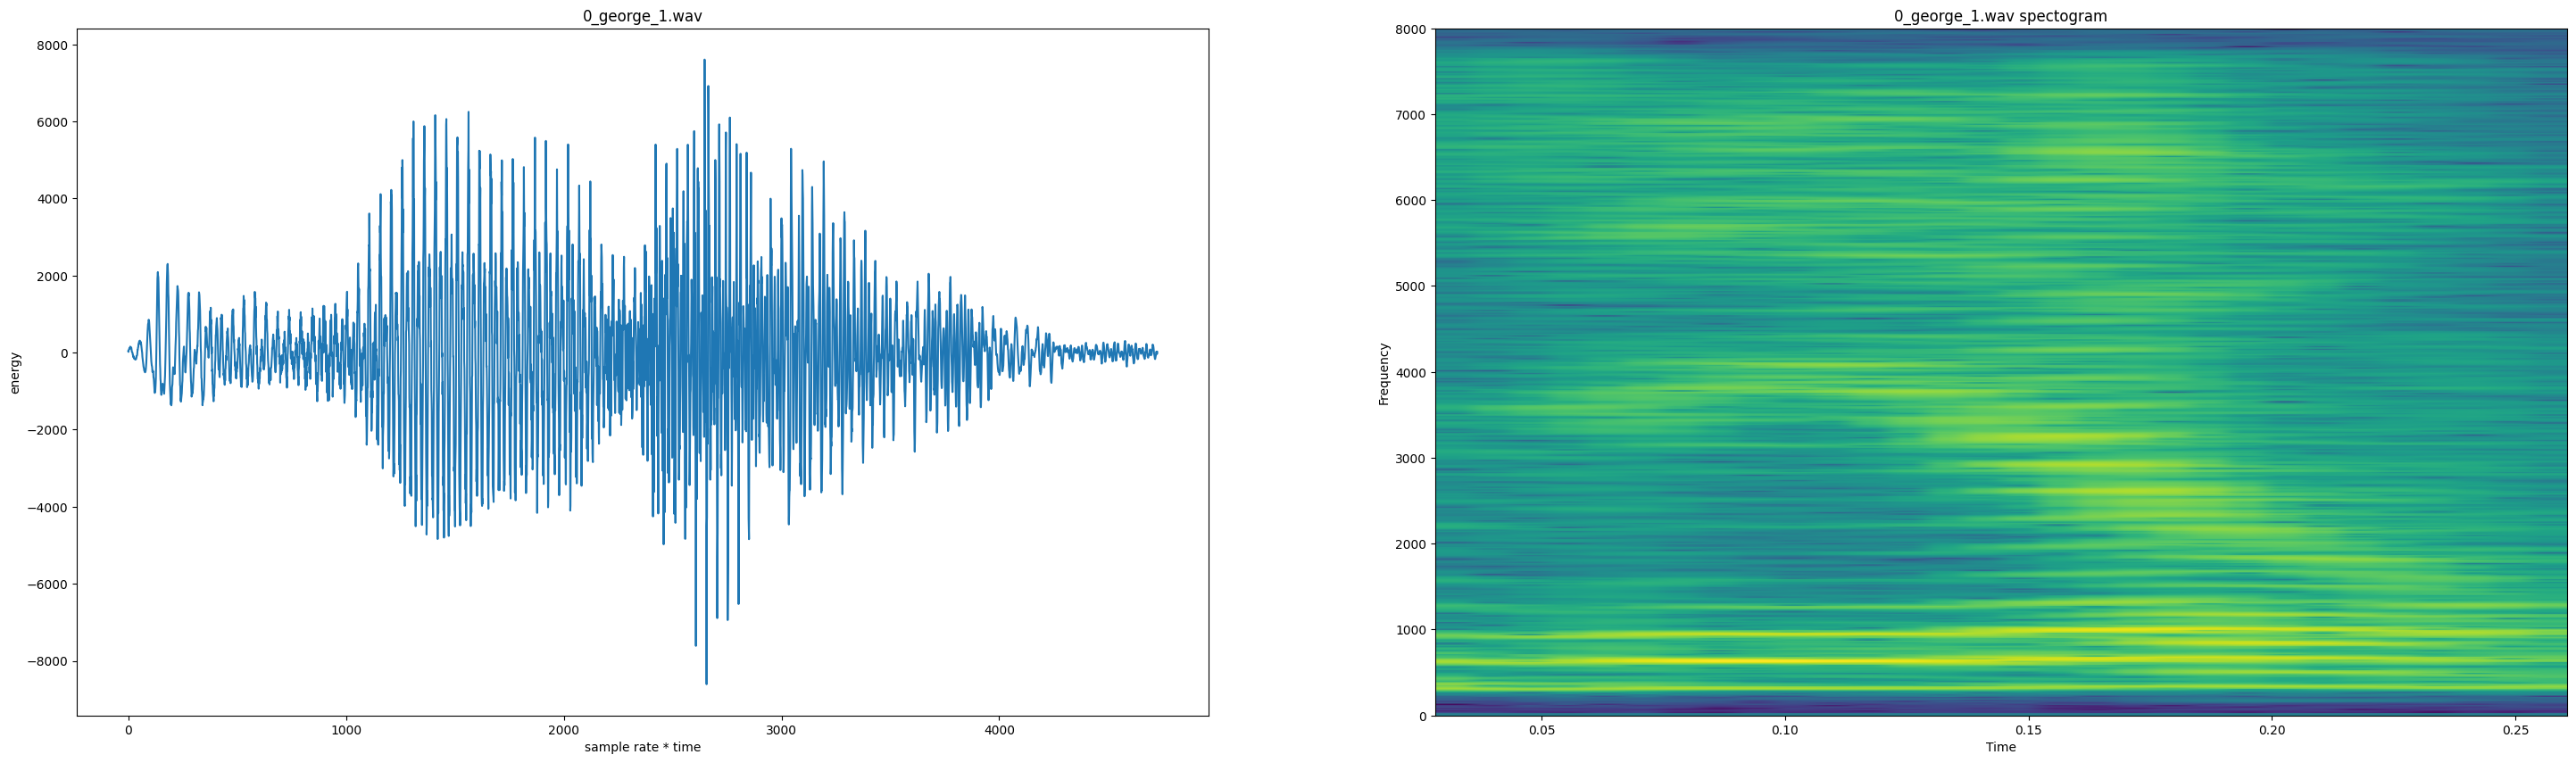

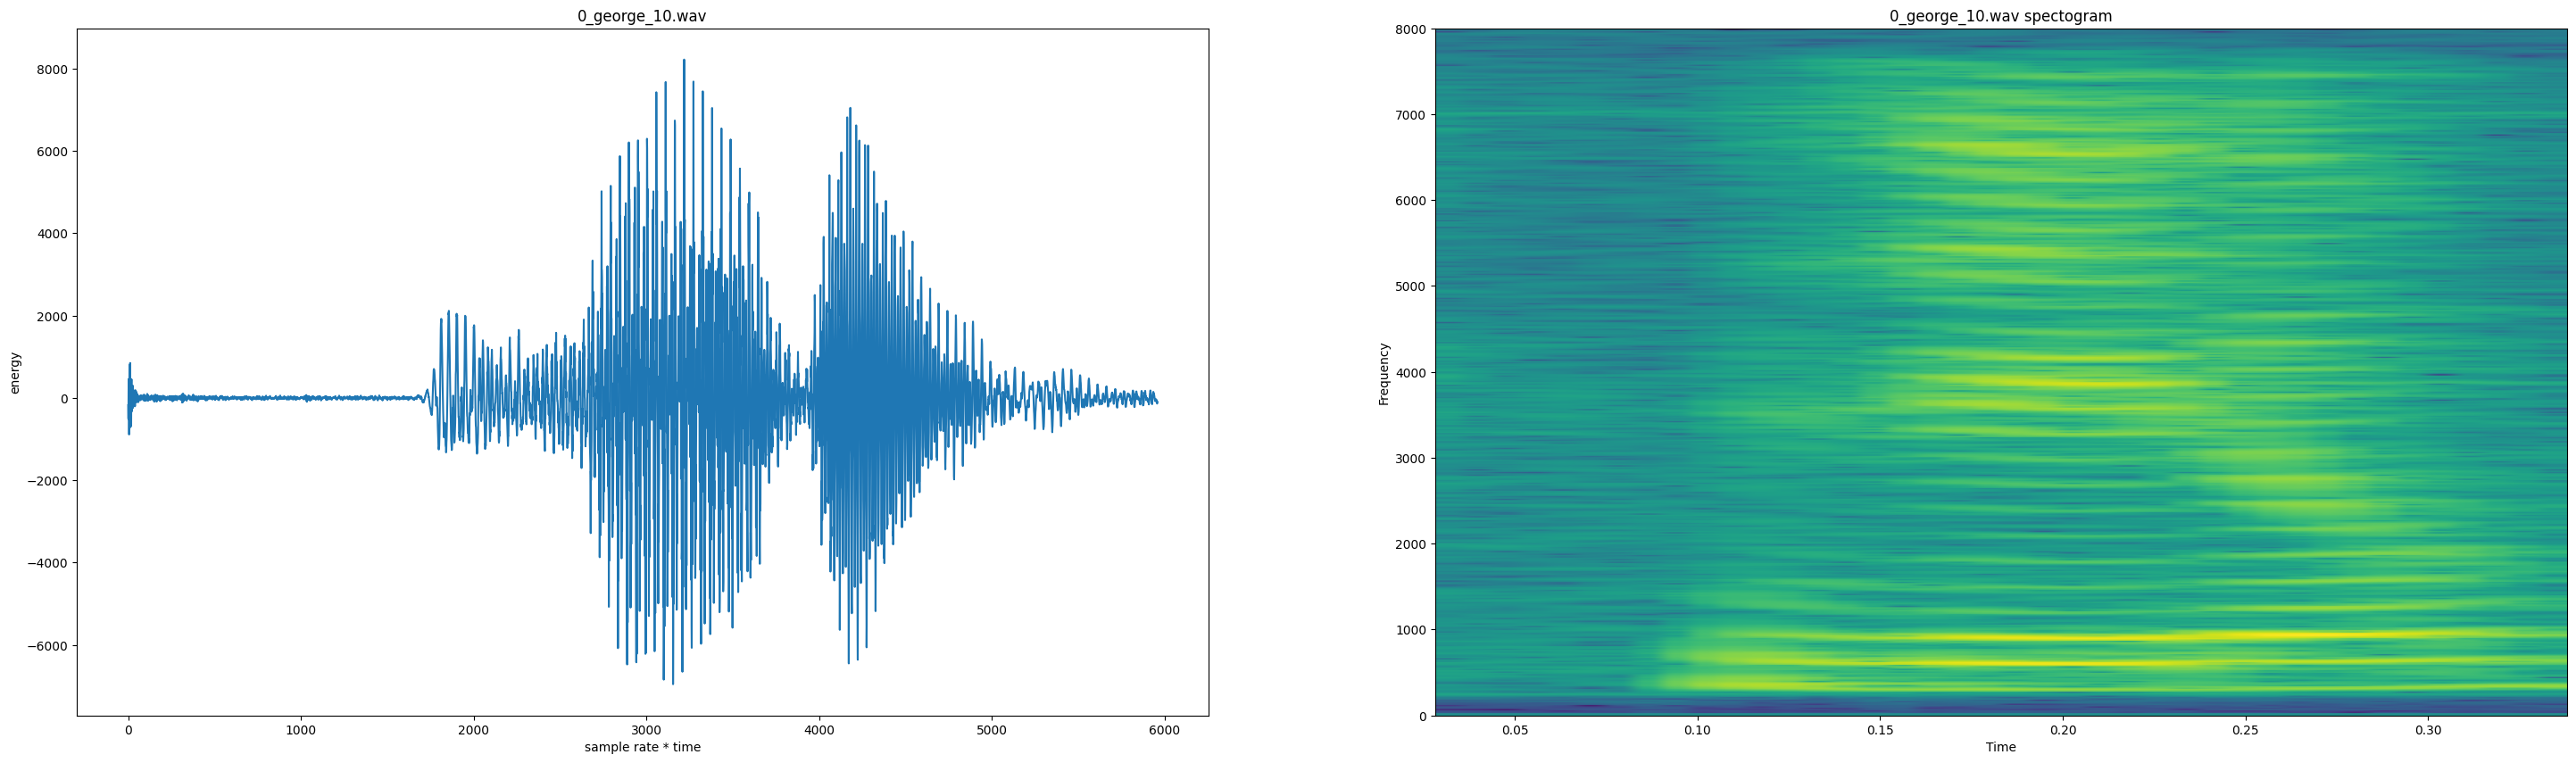

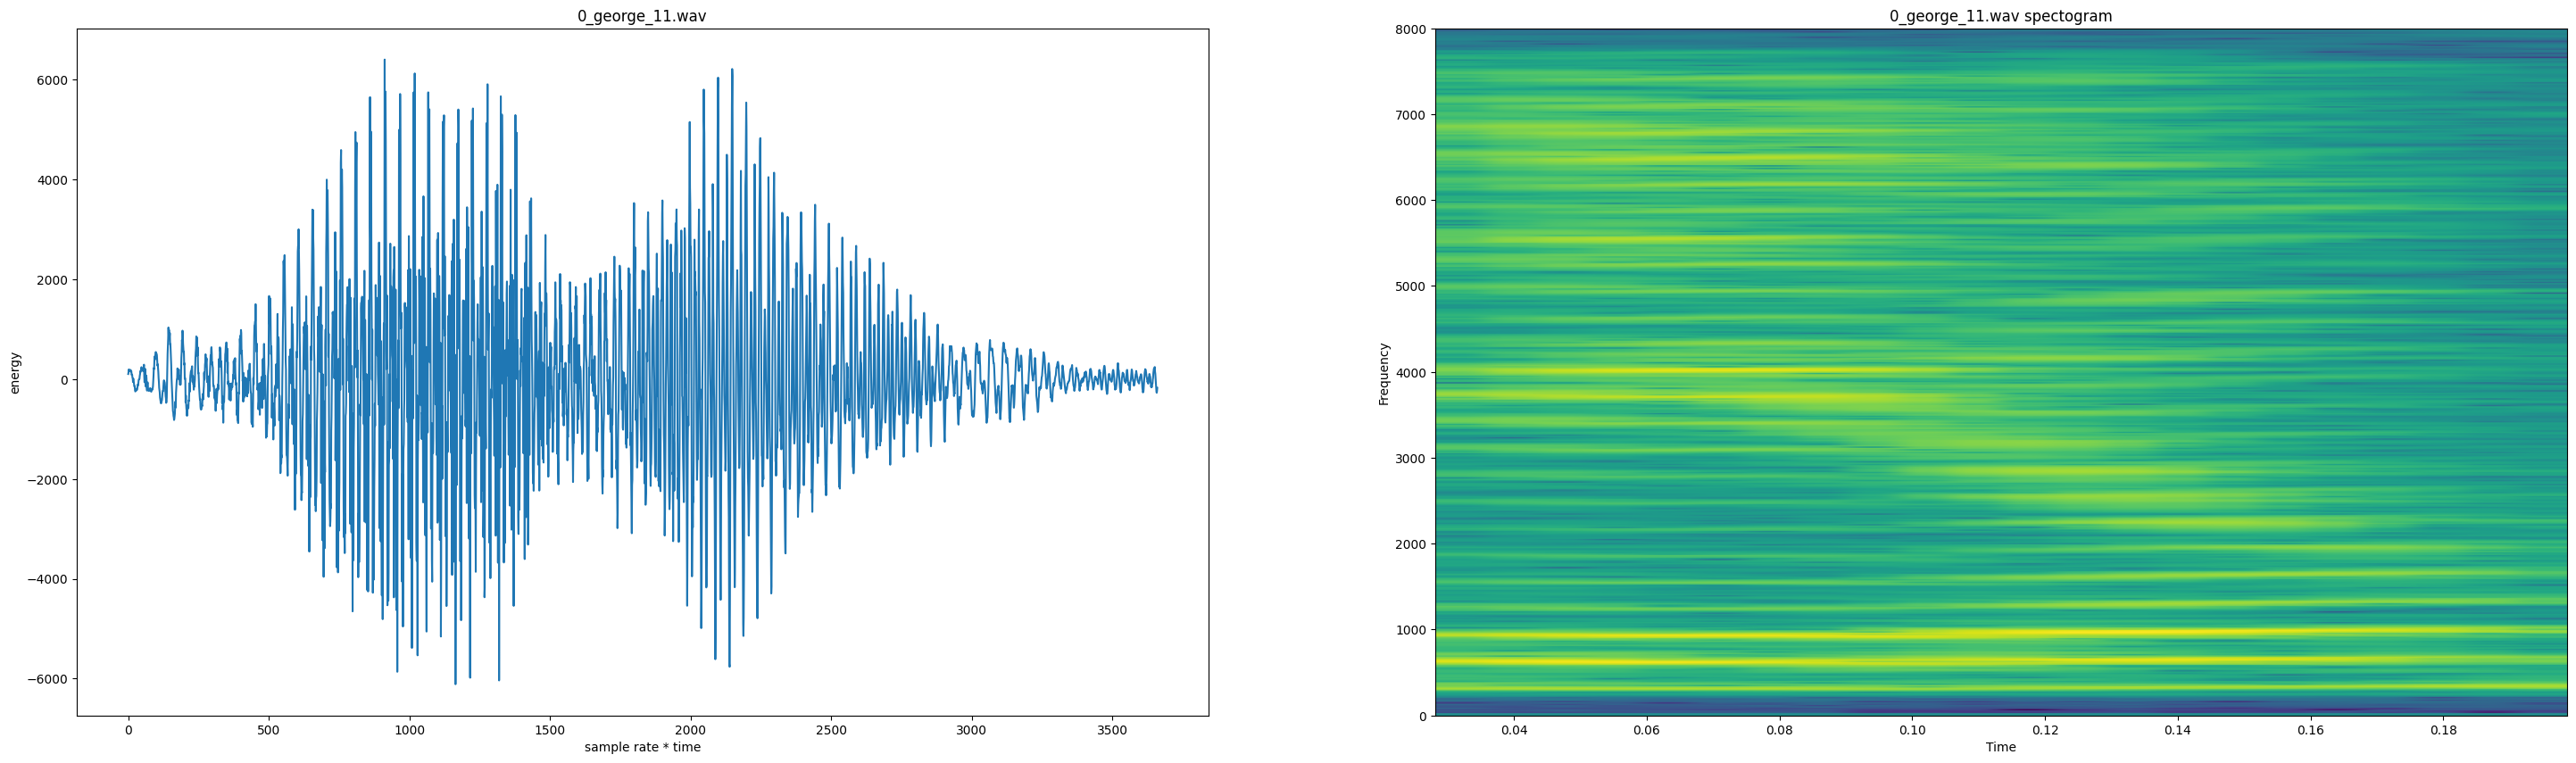

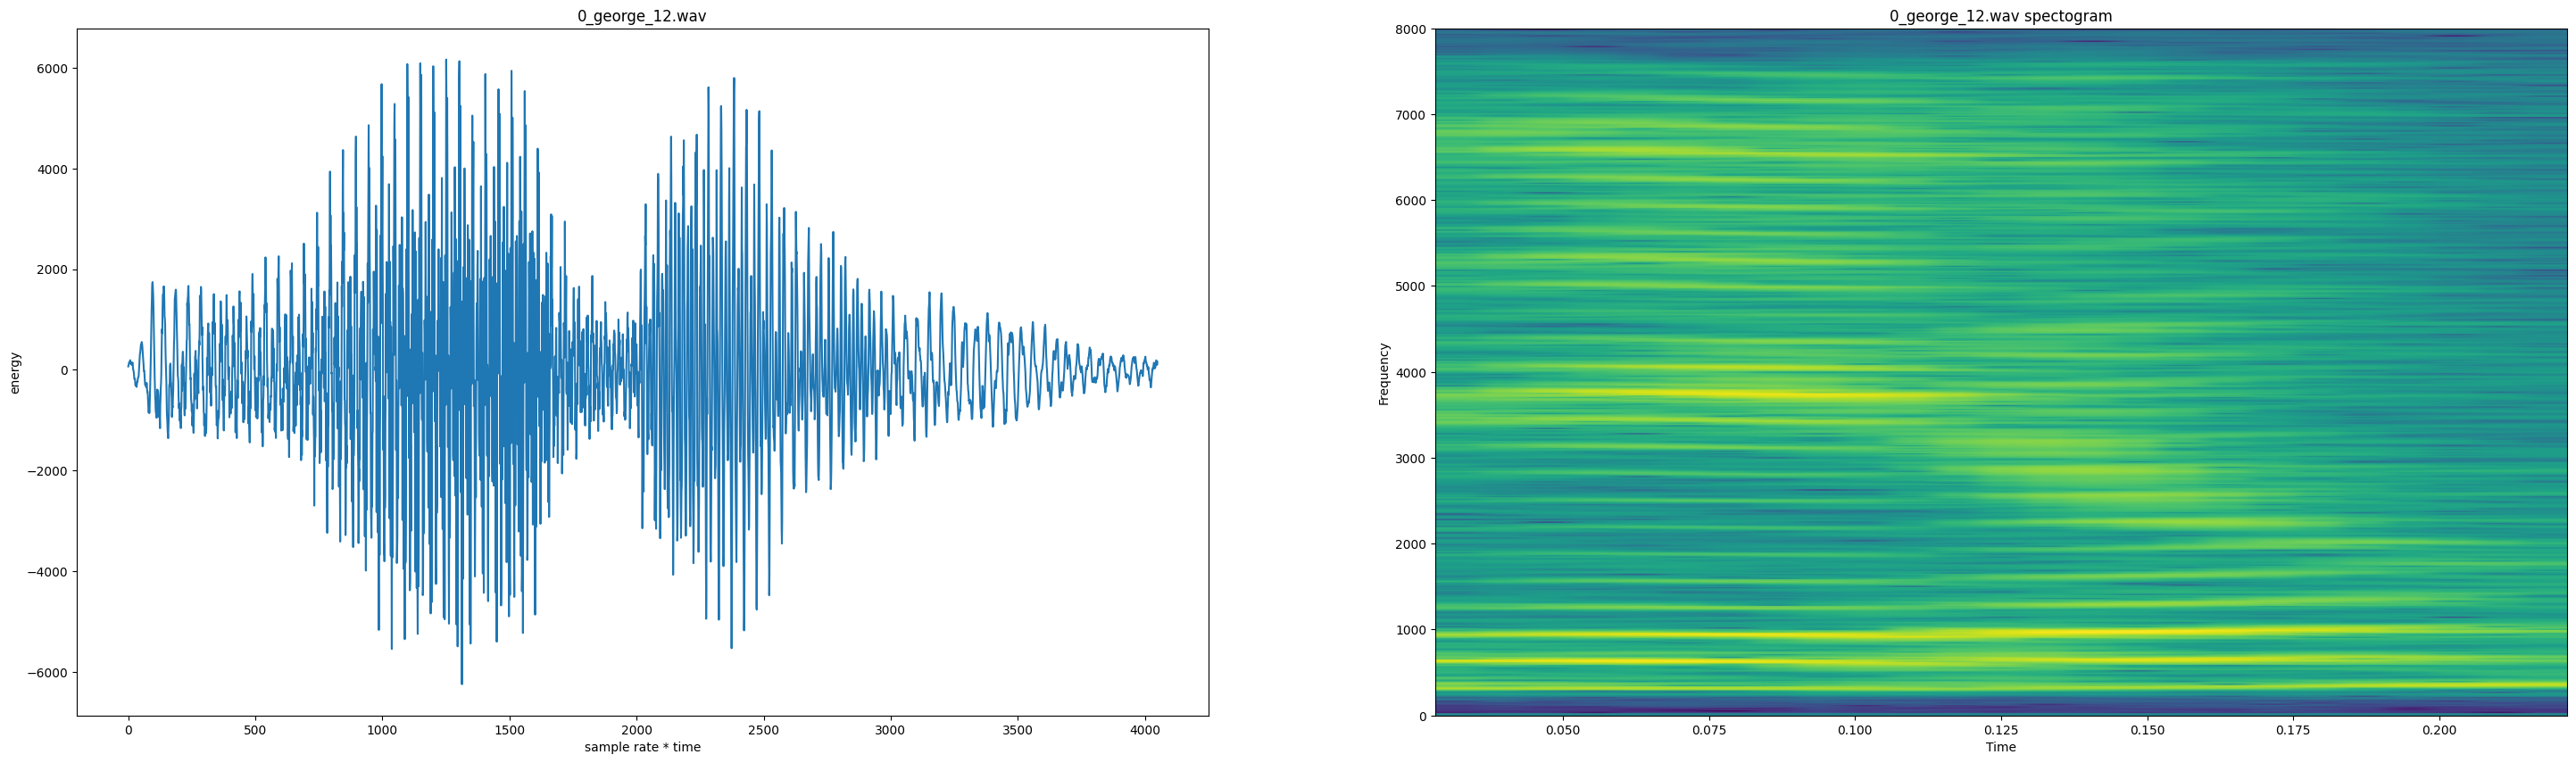

In [ ]:
# Plot first 5 WAV files as a waveform and a frequency spectrum
for i in range(5):
    signal_wave = wave.open(os.path.join(recordings_path, recordings[i]), 'r')
    sample_rate = 16000
    sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype=np.int16)

    plt.figure(figsize=(36,10))
    plot_a = plt.subplot(121)
    plot_a.set_title(recordings[i])
    plot_a.plot(sig)
    plot_a.set_xlabel('sample rate * time')
    plot_a.set_ylabel('energy')

    plot_b = plt.subplot(122)
    plot_b.set_title(recordings[i]+" spectogram")
    plot_b.specgram(sig, NFFT=1024, Fs=sample_rate, noverlap=900)
    plot_b.set_xlabel('Time')
    plot_b.set_ylabel('Frequency')

plt.show()



In [ ]:
# Utility function to get sound and frame rate info
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r') # open the file,retrieve the metadata and the sound data from the file
    frames = wav.readframes(-1) # read all frames from the file ,frames is a string of bytes
    sound_info = pylab.frombuffer(frames, 'int16') # convert the string of bytes to a numpy array
    frame_rate = wav.getframerate() # get the frame rate ,frame_rate is an integer and is the number of frames per second
    wav.close() # close the file
    return sound_info, frame_rate

# For every recording, make a spectogram and save it as label_speaker_no.png
if not os.path.exists(os.path.join(OUTPUT_DIR, 'sounds-images')):
    os.mkdir(os.path.join(OUTPUT_DIR, 'sounds-images'))  # create a folder to save the spectograms

for filename in os.listdir(recordings_path): # loop through all the files and folders
    #print(filename)
    if "wav" in filename: # check whether the file is in .wav format
        file_path = os.path.join(recordings_path, filename) # generate the full path to the file
        file_stem = Path(file_path).stem # get the file name,stems are the part of the file name before the first dot
        #print(file_stem)
        target_dir = f'class_{file_stem[0]}' # get the label from the file name
        dist_dir = os.path.join(os.path.join( OUTPUT_DIR, 'sounds-images'), target_dir) # generate the full path to the folder to save the spectogram
        file_dist_path = os.path.join(dist_dir, file_stem) # generate the full path to the file to save the spectogram
        if not os.path.exists(file_dist_path + '.png'): # check whether the file already exists
            if not os.path.exists(dist_dir): # check whether the folder already exists
                os.mkdir(dist_dir)
            file_stem = Path(file_path).stem # get the file name
            sound_info, frame_rate = get_wav_info(file_path) # get sound and frame rate info
            pylab.specgram(sound_info, Fs=frame_rate) # make a spectogram and save it as label_speaker_no.png (e.g. 0_jackson_0.png)
            pylab.savefig(f'{file_dist_path}.png') # save the spectogram to the folder with the label as the name
            pylab.close() # close the file

# Print the ten classes in our dataset
path_list = os.listdir(os.path.join(OUTPUT_DIR, 'sounds-images'))
print("Classes: \n")
for i in range(10):
     print(path_list[i]) # print the first 10 classes

# File names for class 1
path_list = os.listdir(os.path.join(OUTPUT_DIR, 'sounds-images/class_1'))
print("\nA few example files: \n")
for i in range(10):
        print(path_list[i]) # print the first 10 files



Classes: 

class_3
class_2
class_5
class_8
class_6
class_0
class_9
class_1
class_7
class_4

A few example files: 

1_yweweler_40.png
1_yweweler_10.png
1_jackson_9.png
1_jackson_24.png
1_nicolas_3.png
1_jackson_36.png
1_lucas_15.png
1_theo_31.png
1_yweweler_37.png
1_jackson_19.png


In [ ]:
# Declare constants
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
BATCH_SIZE = 32
N_CHANNELS = 3
N_CLASSES = 10

# Make a dataset containing the training spectrograms
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=os.path.join(OUTPUT_DIR, 'sounds-images'),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="training",
                                             seed=0)

# Make a dataset containing the validation spectrogram
valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=os.path.join(OUTPUT_DIR, 'sounds-images'),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="validation",
                                             seed=0)

Found 3000 files belonging to 10 classes.
Using 2400 files for training.
Found 3000 files belonging to 10 classes.
Using 600 files for validation.


In [ ]:
# print how many image bachs  are in the training and validation datasets
print("Number of training image bachs: ", len(train_ds))
print("Number of validation image bachs: ", len(valid_ds))

Number of training image bachs:  75
Number of validation image bachs:  19


In [ ]:
# split valid dataset to test and valid
test_ds = valid_ds.take(8) # get 100 data from valid dataset
valid_ds = valid_ds.skip(8) # skip first 100

In [ ]:
# how many bachs are in the training ,test and validation datasets
print("Number of training batches: ", len(train_ds))
print("Number of validation batches: ", len(valid_ds))
print("Number of test  batches: ", len(test_ds))

Number of training batches:  75
Number of validation batches:  11
Number of test  batches:  8


In [ ]:
#Checking images and labels shapes (amount of images, height, width, color channels)
for ds in [train_ds,valid_ds,test_ds]:
    for image_batch, labels_batch in ds:
      print(f" image shape :{ image_batch.shape}")
      print(f" label shape :{labels_batch.shape}")
      break


 image shape :(32, 256, 256, 3)
 label shape :(32,)
 image shape :(32, 256, 256, 3)
 label shape :(32,)
 image shape :(32, 256, 256, 3)
 label shape :(32,)


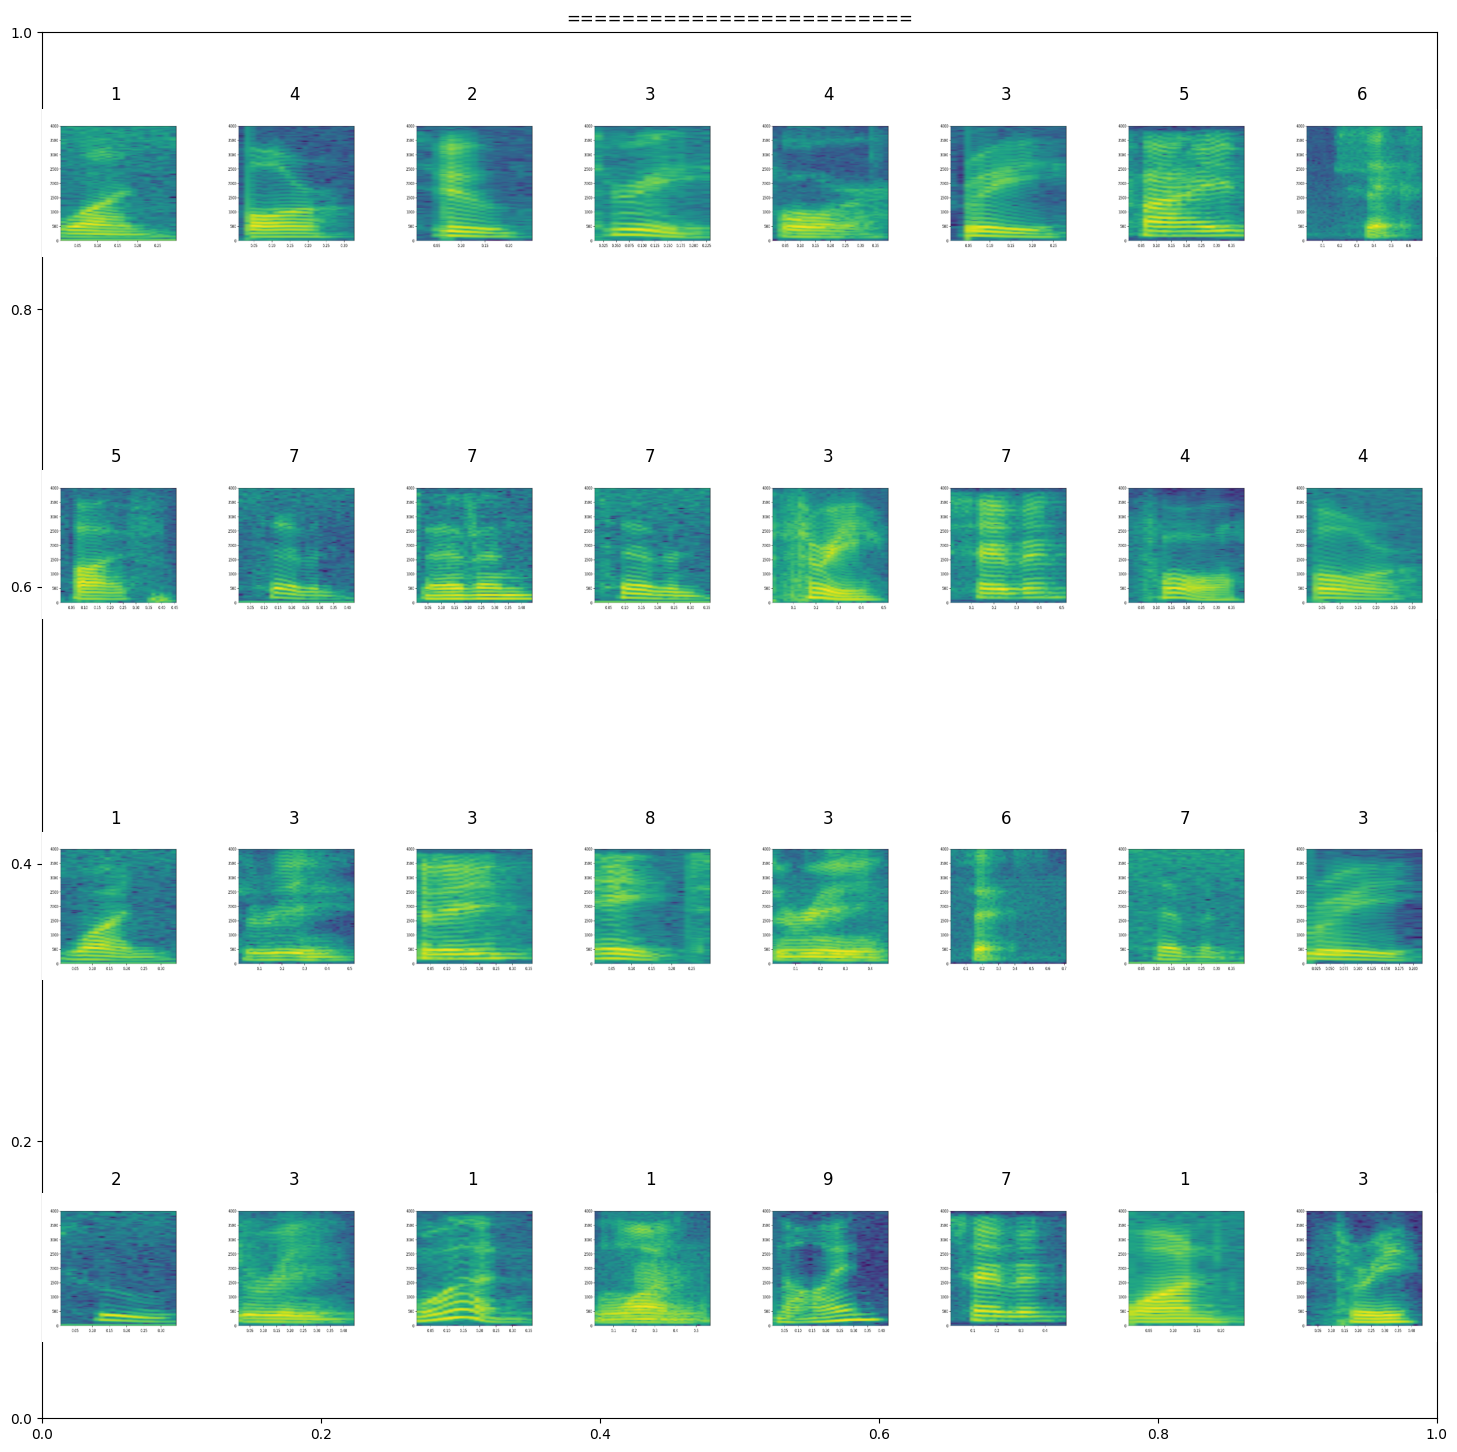

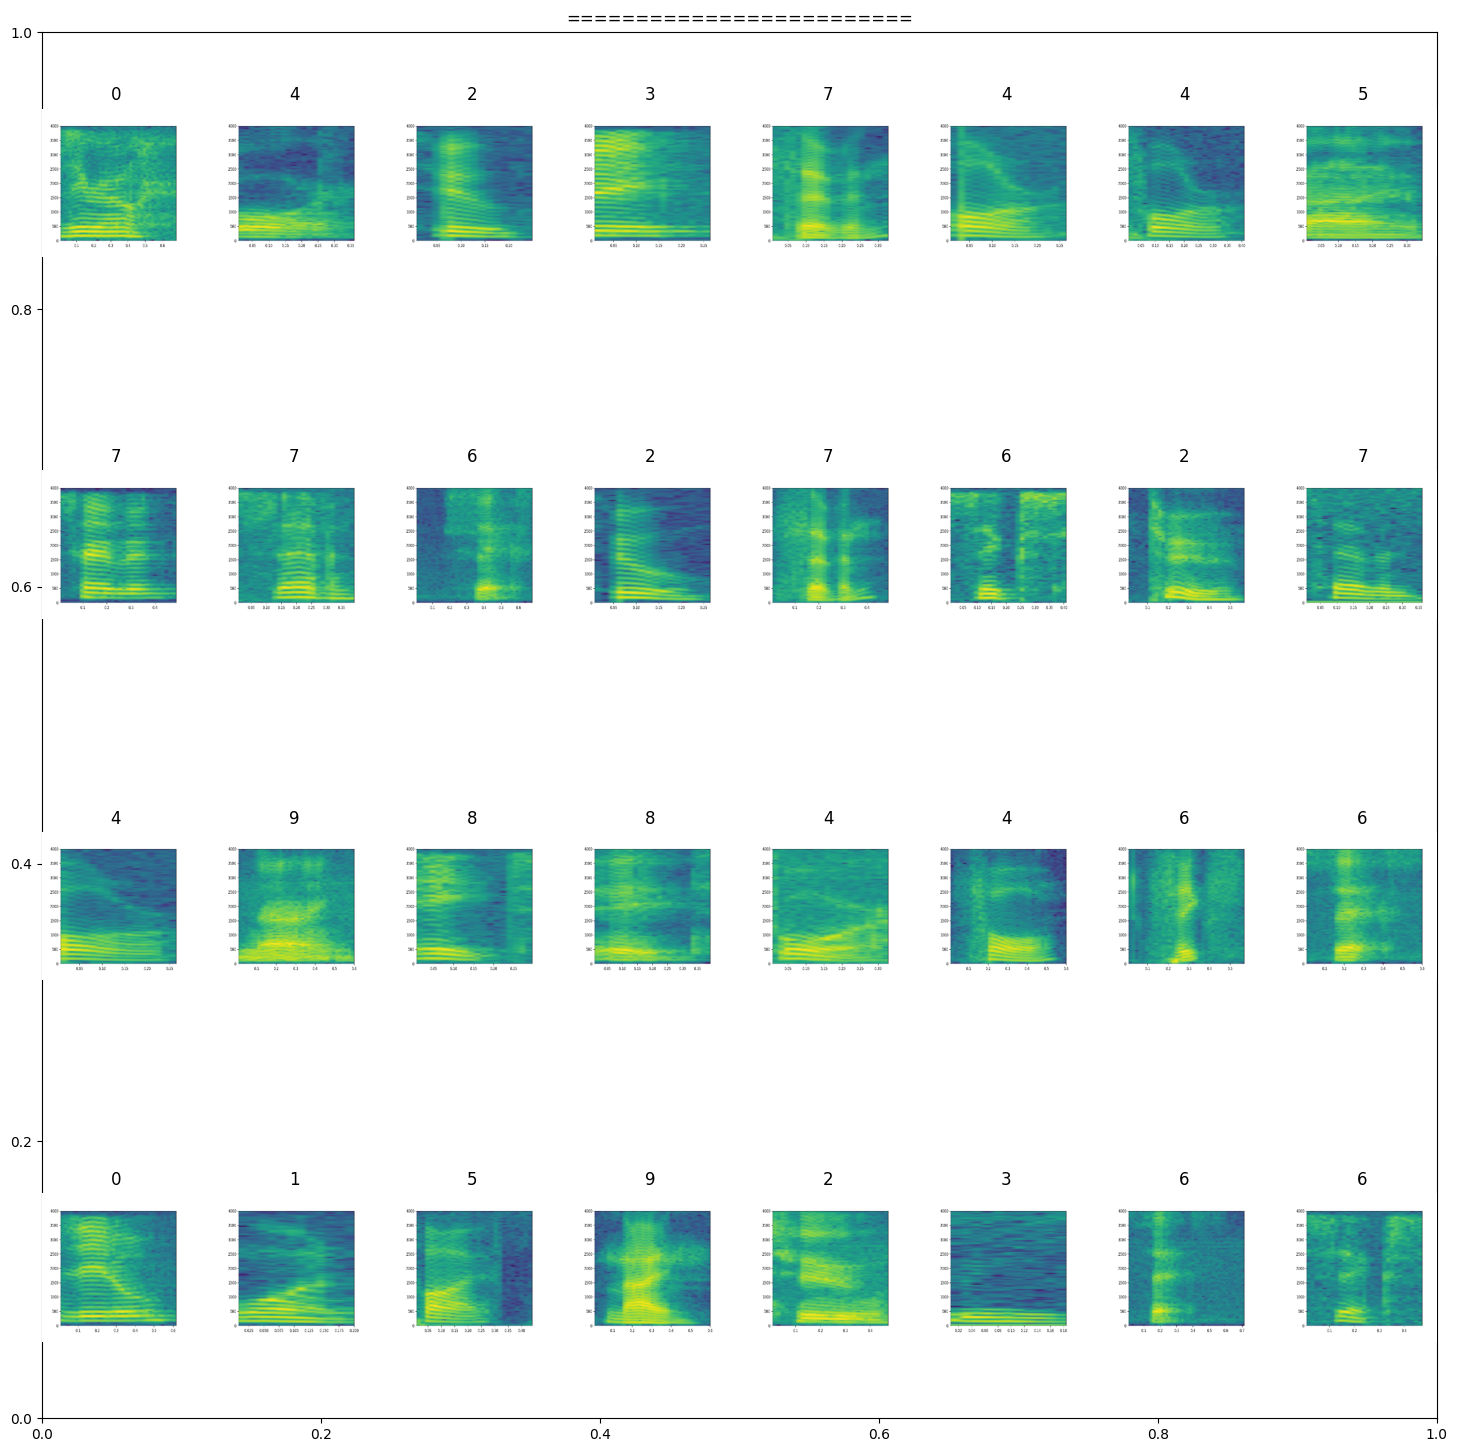

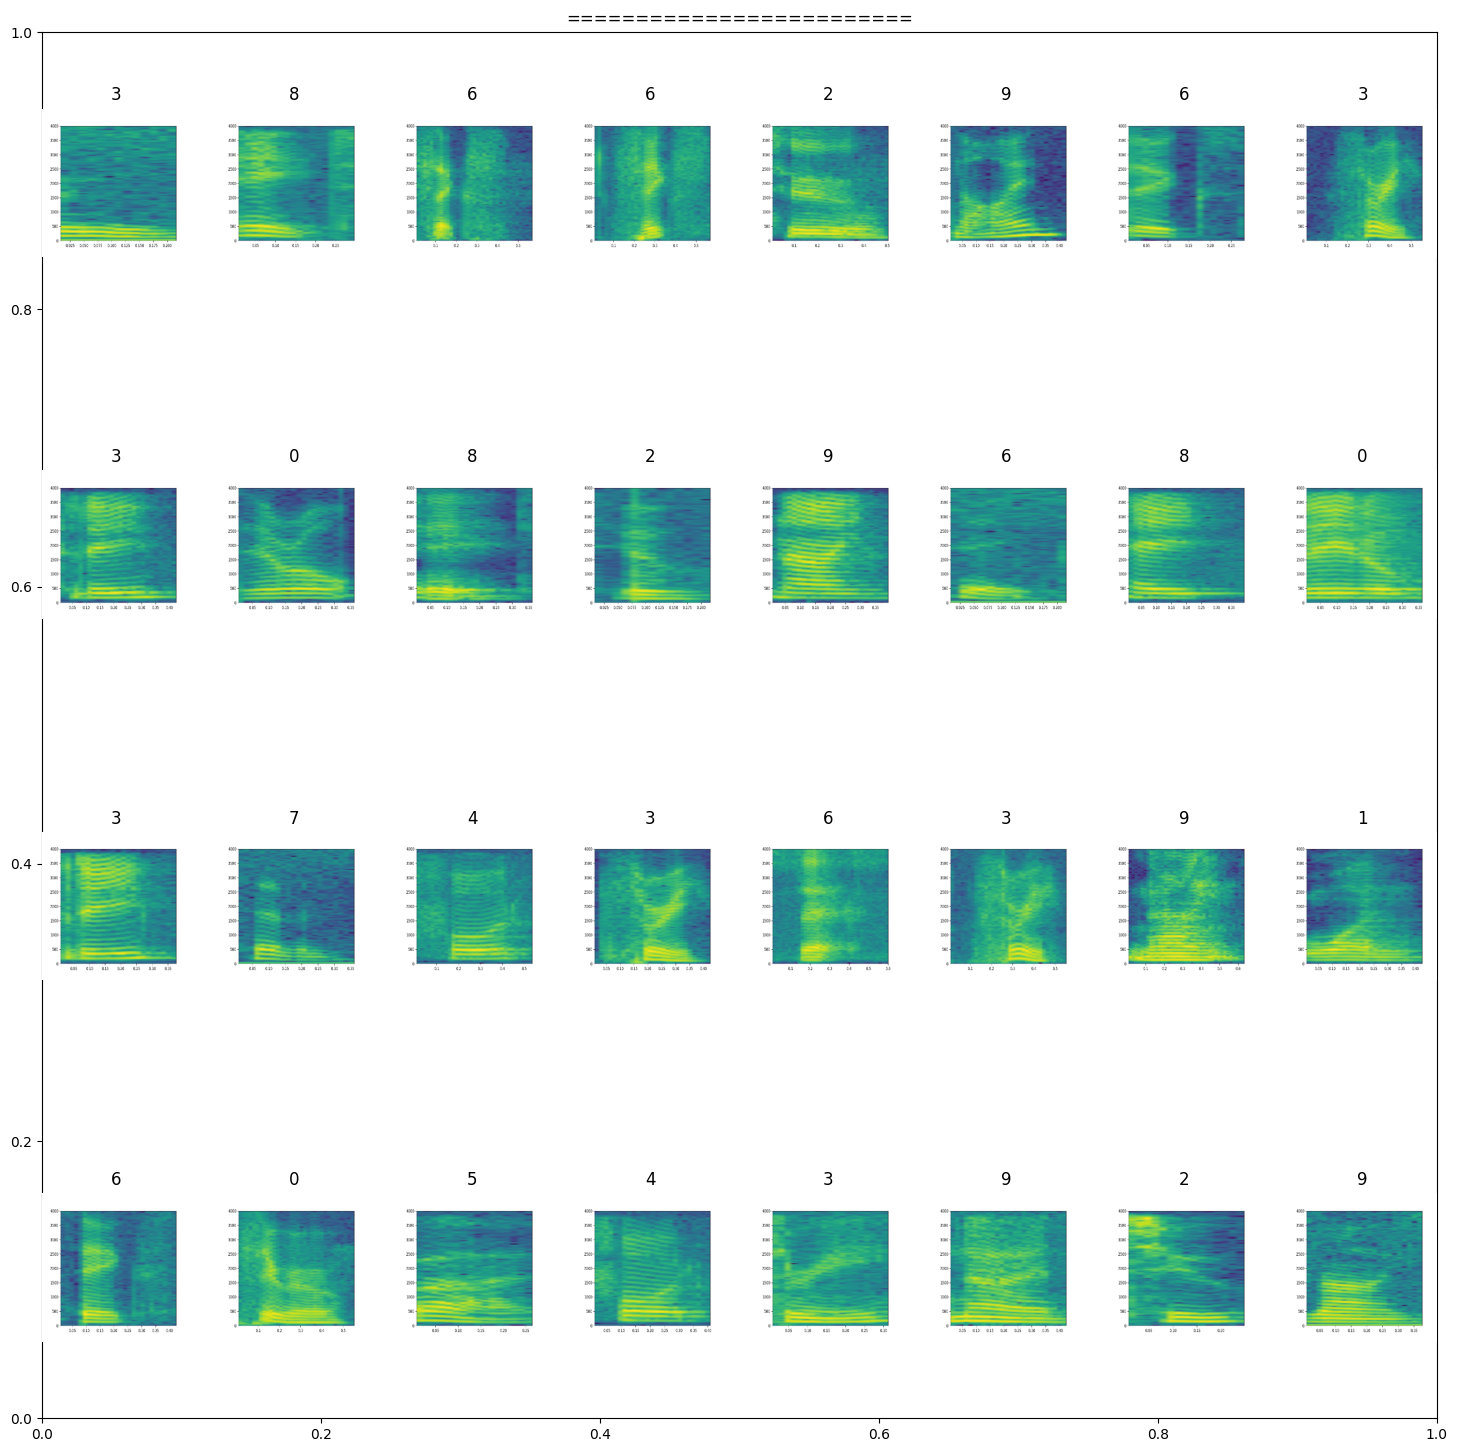

In [ ]:
#Displaying image samples
for ds in [train_ds,valid_ds,test_ds]:
    plt.figure(figsize=(18, 18))
    plt.title("=========================")

    for images, labels in train_ds.take(1):
        for i in range(32):
            ax = plt.subplot(4,8,i+1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(int(labels[i]))
            plt.axis("off")
plt.show()

In [ ]:
import tensorflow as tf

# Function to prepare our datasets for modeling
def prepare(ds, augment=False):
    # Define the transformations using the updated layer names
    rescale = tf.keras.Sequential([tf.keras.layers.Rescaling(1./255)])
    flip_and_rotate = tf.keras.Sequential([
        tf.keras.layers.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.RandomRotation(0.2)
    ])

    # Rescale the data to the range [0,1] for all datasets
    ds = ds.map(lambda x, y: (rescale(x, training=True), y))
    # Apply data augmentation if augment is True
    if augment:
        ds = ds.map(lambda x, y: (flip_and_rotate(x, training=True), y))
    return ds

# Prepare datasets without augmentation
train_ds = prepare(train_ds, augment=False)
valid_ds = prepare(valid_ds, augment=False)
test_ds = prepare(test_ds, augment=False)


In [ ]:
def conv_net(select_model=1):
  model = tf.keras.Sequential()
  if select_model==1:

    model.add(tf.keras.layers.Conv2D(96, kernel_size=(3, 3), input_shape=(
        IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS), strides=(2, 2), activation='relu'))

    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (3,3),strides = (2,2)))
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1) ,activation='relu', padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(4096, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(4096, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(2048, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1024, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))


    model.add(tf.keras.layers.Dense(10, activation='softmax'))

  elif select_model==2:
    # Create CNN model

    model.add(tf.keras.layers.Input(
        shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))

    model.add(tf.keras.layers.Conv2D(
        32, 3, strides=2, padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Dense(10, activation='softmax'))
  elif select_model==3:
    model.add(tf.keras.layers.Input(
        shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))
    model.add(tf.keras.layers.Conv2D(32, 3, strides=2, padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

  elif select_model==4:


    # Create CNN model
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))
    model.add(tf.keras.layers.Conv2D(
        32, 3, strides=2, padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))

  else:

    model.add(tf.keras.layers.experimental.preprocessing.Rescaling(
        1./255, input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))

    model.add(tf.keras.layers.Conv2D(16, 3, padding="same", activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.Conv2D(64, 3, padding="same", activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation="relu"))

    model.add(tf.keras.layers.Dense(10, activation='softmax'))

  return model

In [ ]:
model=conv_net(select_model=3)

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,487,498 (32.38 MB)

 Trainable params: 8,486,090 (32.37 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['accuracy'],
)

# Train model for 10 epochs, capture the history
history = model.fit(train_ds, epochs=10, validation_data=valid_ds)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 34s 306ms/step - accuracy: 0.6655 - loss: 1.1179 - val_accuracy: 0.0988 - val_loss: 4.8049
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 292ms/step - accuracy: 0.9335 - loss: 0.2377 - val_accuracy: 0.0814 - val_loss: 4.8086
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 268ms/step - accuracy: 0.9686 - loss: 0.1357 - val_accuracy: 0.1977 - val_loss: 4.3257
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 302ms/step - accuracy: 0.9872 - loss: 0.0653 - val_accuracy: 0.2791 - val_loss: 3.9483
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 289ms/step - accuracy: 0.9903 - loss: 0.0497 - val_accuracy: 0.3895 - val_loss: 2.0793
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 310ms/step - accuracy: 0.9935 - loss: 0.0300 - val_accuracy: 0.6773 - val_loss: 1.0619
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 273ms/step - accuracy: 0.9938 - loss: 0.0281 - val_accuracy: 0.9331 - val_loss: 0.2467
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 42s 292ms/step - accuracy: 0.9980 - loss: 0.0190 - val_accu

In [ ]:
model_no_aug = model.save('spectogram_modelcnn.h5')

model_no_aug = tf.keras.models.load_model('spectogram_modelcnn.h5')

In [ ]:
final_loss, final_acc = model.evaluate(test_ds, verbose=0)
print("Final loss: {0:.6f}, test accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.088227, test accuracy: 0.984375


In [ ]:
import tensorflow as tf

IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

def preprocess_image(image, label):
    # Resize the image to the desired dimensions
    image = tf.image.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))

    # Preprocess the image using EfficientNet's preprocessing function
    # This function scales pixel values in the way the EfficientNet model expects.
    image = tf.keras.applications.efficientnet.preprocess_input(image)
    return image, label

# Apply the preprocessing function to each dataset
train_ds = train_ds.map(preprocess_image)
valid_ds = valid_ds.map(preprocess_image)
test_ds = test_ds.map(preprocess_image)


In [ ]:
# prompt: load pre-trained effcientNet

import tensorflow as tf

# Load the pre-trained EfficientNet model
base_model = tf.keras.applications.EfficientNetB0(
    include_top=False, weights='imagenet', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)
)

# Freeze the base model layers
base_model.trainable = False

# Create a new model on top of the pre-trained EfficientNet
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(N_CLASSES, activation='softmax')
])

# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Print the model summary
model.summary()

# Train the model
history = model.fit(train_ds, epochs=10, validation_data=valid_ds)

# Evaluate the model
final_loss, final_acc = model.evaluate(test_ds, verbose=0)
print("Final loss: {0:.6f}, test accuracy: {1:.6f}".format(final_loss, final_acc))


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,062,381 (15.50 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 64s 484ms/step - accuracy: 0.1054 - loss: 2.3330 - val_accuracy: 0.1076 - val_loss: 2.3293
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 56s 325ms/step - accuracy: 0.0961 - loss: 2.3437 - val_accuracy: 0.0785 - val_loss: 2.3317
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 25s 336ms/step - accuracy: 0.0950 - loss: 2.3320 - val_accuracy: 0.0959 - val_loss: 2.3480
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 40s 327ms/step - accuracy: 0.0935 - loss: 2.3392 - val_accuracy: 0.0872 - val_loss: 2.3597
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 25s 328ms/step - accuracy: 0.1012 - loss: 2.3419 - val_accuracy: 0.0843 - val_loss: 2.3445
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 389ms/step - accuracy: 0.1024 - loss: 2.3376 - val_accuracy: 0.0959 - val_loss: 2.3446
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 25s 334ms/step - accuracy: 0.1005 - loss: 2.3436 - val_accuracy: 0.0930 - val_loss: 2.3180
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 403ms/step - accuracy: 0.0933 - loss: 2.3407 - val_accu

In [ ]:
# Zip the directory (this creates a file named output.zip)
!zip -r output.zip "/content/output"

# Import the files module and download the zipped file
from google.colab import files
files.download('output.zip')


  adding: content/output/ (stored 0%)
  adding: content/output/sounds-images/ (stored 0%)
  adding: content/output/sounds-images/class_3/ (stored 0%)
  adding: content/output/sounds-images/class_3/3_lucas_42.png (deflated 1%)
  adding: content/output/sounds-images/class_3/3_theo_13.png (deflated 2%)
  adding: content/output/sounds-images/class_3/3_jackson_49.png (deflated 1%)
  adding: content/output/sounds-images/class_3/3_jackson_41.png (deflated 1%)
  adding: content/output/sounds-images/class_3/3_yweweler_23.png (deflated 1%)
  adding: content/output/sounds-images/class_3/3_yweweler_0.png (deflated 1%)
  adding: content/output/sounds-images/class_3/3_yweweler_17.png (deflated 1%)
  adding: content/output/sounds-images/class_3/3_jackson_21.png (deflated 1%)
  adding: content/output/sounds-images/class_3/3_george_12.png (deflated 1%)
  adding: content/output/sounds-images/class_3/3_nicolas_14.png (deflated 2%)
  adding: content/output/sounds-images/class_3/3_lucas_14.png (deflated 1%

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/mohsen/output.zip

output.zip  spectogram_modelcnn.h5


In [ ]:
!unzip /content/drive/MyDrive/mohsen/output.zip

Archive:  /content/drive/MyDrive/mohsen/output.zip
   creating: content/output/
   creating: content/output/sounds-images/
   creating: content/output/sounds-images/class_3/
  inflating: content/output/sounds-images/class_3/3_lucas_42.png  
  inflating: content/output/sounds-images/class_3/3_theo_13.png  
  inflating: content/output/sounds-images/class_3/3_jackson_49.png  
  inflating: content/output/sounds-images/class_3/3_jackson_41.png  
  inflating: content/output/sounds-images/class_3/3_yweweler_23.png  
  inflating: content/output/sounds-images/class_3/3_yweweler_0.png  
  inflating: content/output/sounds-images/class_3/3_yweweler_17.png  
  inflating: content/output/sounds-images/class_3/3_jackson_21.png  
  inflating: content/output/sounds-images/class_3/3_george_12.png  
  inflating: content/output/sounds-images/class_3/3_nicolas_14.png  
  inflating: content/output/sounds-images/class_3/3_lucas_14.png  
  inflating: content/output/sounds-images/class_3/3_theo_7.png  
  inflat

In [ ]:
!mv /content/content/* /content/
!rm -r /content/content

In [ ]:
!ls

drive  output  sample_data


In [8]:
import os
import wave
import numpy as np
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio, display
from pathlib import Path

# Utility function to get sound and frame rate info from a WAV file
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = np.frombuffer(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

# Function to augment audio: speed_factor >1 speeds up; <1 slows down; noise_factor adds noise.
def augment_audio(file_path, speed_factor=1.0, noise_factor=0.0):
    # Load audio preserving the native sampling rate
    y, sr = librosa.load(file_path, sr=None)
    if speed_factor != 1.0:
        y = librosa.effects.time_stretch(y, rate=speed_factor)
    if noise_factor > 0.0:
        noise = np.random.randn(len(y))
        y = y + noise_factor * noise
    return y, sr

# Specify a sample file path from your recordings folder (update this as needed)
sample_file = '/root/.cache/kagglehub/datasets/alanchn31/free-spoken-digits/versions/1/free-spoken-digit-dataset-master/recordings/0_jackson_0.wav'


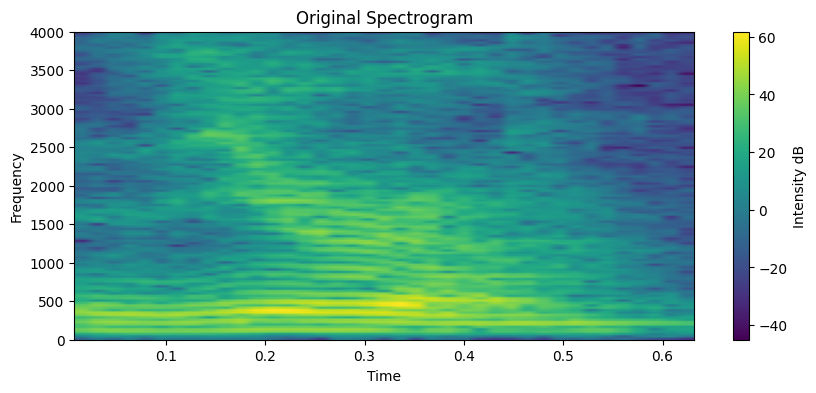

In [9]:
# Load the original audio
sound_info, frame_rate = get_wav_info(sample_file)

# Display the original spectrogram
plt.figure(figsize=(10, 4))
plt.specgram(sound_info, Fs=frame_rate)
plt.title("Original Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(label='Intensity dB')
plt.show()

# Play the original audio
display(Audio(sample_file, rate=frame_rate))


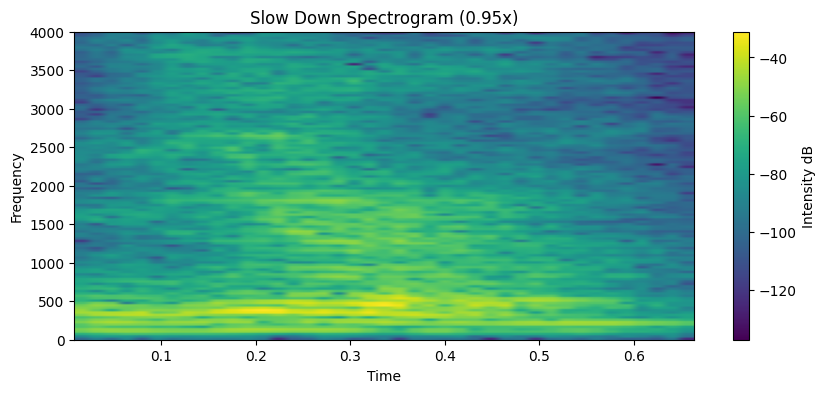

In [10]:
# Augmentation: Slow down by 5% (speed factor = 0.95)
y_slow, sr = augment_audio(sample_file, speed_factor=0.95)

# Display the slowed-down spectrogram
plt.figure(figsize=(10, 4))
plt.specgram(y_slow, Fs=sr)
plt.title("Slow Down Spectrogram (0.95x)")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(label='Intensity dB')
plt.show()

# Play the slowed-down audio
display(Audio(y_slow, rate=sr))


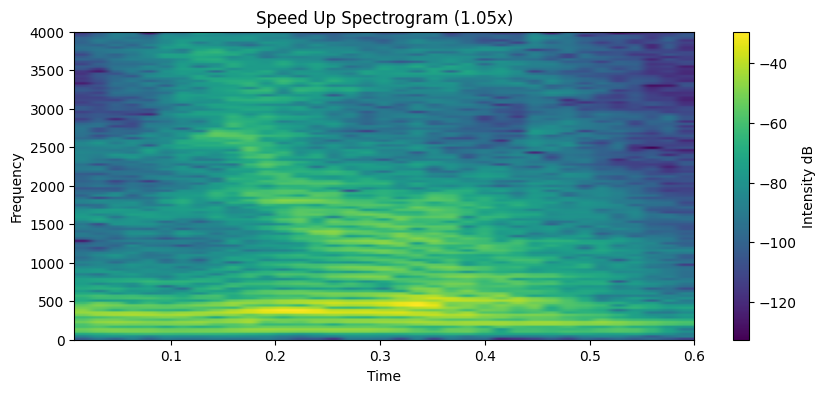

In [13]:
# Augmentation: Speed up by 5% (speed factor = 1.05)
y_speed, sr = augment_audio(sample_file, speed_factor=1.05)

# Display the speeded-up spectrogram
plt.figure(figsize=(10, 4))
plt.specgram(y_speed, Fs=sr)
plt.title("Speed Up Spectrogram (1.05x)")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(label='Intensity dB')
plt.show()

# Play the speeded-up audio
display(Audio(y_speed, rate=sr))


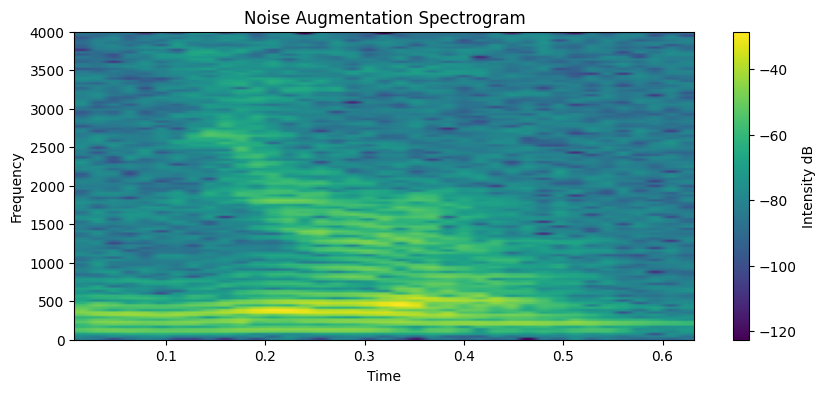

In [14]:
# Augmentation: Add noise (using noise_factor=0.005 as an example)
y_noise, sr = augment_audio(sample_file, speed_factor=1.0, noise_factor=0.005)

# Display the noise-augmented spectrogram
plt.figure(figsize=(10, 4))
plt.specgram(y_noise, Fs=sr)
plt.title("Noise Augmentation Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(label='Intensity dB')
plt.show()

# Play the noise-augmented audio
display(Audio(y_noise, rate=sr))


In [ ]:
output_base = os.path.join(OUTPUT_DIR, 'sounds-images')

# Create base output folder if it doesn't exist
if not os.path.exists(output_base):
    os.mkdir(output_base)

# Process each .wav file in the recordings_path
for filename in os.listdir(recordings_path):
    if filename.lower().endswith('.wav'):
        file_path = os.path.join(recordings_path, filename)
        file_stem = Path(file_path).stem  # e.g., "0_jackson_0"
        target_dir = f'class_{file_stem[0]}'  # assuming label is the first character
        dist_dir = os.path.join(output_base, target_dir)
        if not os.path.exists(dist_dir):
            os.mkdir(dist_dir)

        # Augmentation 1: Speed up by 5% (factor = 1.05)
        speedup_stem = file_stem + '_speedup'
        speedup_img_path = os.path.join(dist_dir, speedup_stem + '.png')
        if not os.path.exists(speedup_img_path):
            y_aug, sr_aug = augment_audio(file_path, speed_factor=1.05)
            pylab.specgram(y_aug, Fs=sr_aug)
            pylab.savefig(speedup_img_path)
            pylab.close()

In [11]:
# Process each .wav file in the recordings_path
for filename in os.listdir(recordings_path):
    if filename.lower().endswith('.wav'):
        file_path = os.path.join(recordings_path, filename)
        file_stem = Path(file_path).stem  # e.g., "0_jackson_0"
        target_dir = f'class_{file_stem[0]}'  # assuming label is the first character
        dist_dir = os.path.join(output_base, target_dir)
        if not os.path.exists(dist_dir):
            os.mkdir(dist_dir)

        # Augmentation 2: Slow down by 5% (factor = 0.95)
        slowdown_stem = file_stem + '_slowdown'
        slowdown_img_path = os.path.join(dist_dir, slowdown_stem + '.png')
        if not os.path.exists(slowdown_img_path):
            y_aug, sr_aug = augment_audio(file_path, speed_factor=0.95)
            pylab.specgram(y_aug, Fs=sr_aug)
            pylab.savefig(slowdown_img_path)
            pylab.close()

In [ ]:

# Process each .wav file in the recordings_path
for filename in os.listdir(recordings_path):
    if filename.lower().endswith('.wav'):
        file_path = os.path.join(recordings_path, filename)
        file_stem = Path(file_path).stem  # e.g., "0_jackson_0"
        target_dir = f'class_{file_stem[0]}'  # assuming label is the first character
        dist_dir = os.path.join(output_base, target_dir)
        if not os.path.exists(dist_dir):
            os.mkdir(dist_dir)

        # Augmentation 3: Add speech noise (adjust noise_factor as needed, e.g., 0.005)
        noise_stem = file_stem + '_noise'
        noise_img_path = os.path.join(dist_dir, noise_stem + '.png')
        if not os.path.exists(noise_img_path):
            y_aug, sr_aug = augment_audio(file_path, speed_factor=1.0, noise_factor=0.005)
            pylab.specgram(y_aug, Fs=sr_aug)
            pylab.savefig(noise_img_path)
            pylab.close()

In [ ]:
import cv2
import numpy as np

def horizontal_squeeze(image, squeeze_factor=0.95):
    """
    Squeezes the image horizontally by the given factor.
    The image width is scaled to (squeeze_factor * original width),
    then padded (using reflection) to restore the original width.

    Parameters:
        image (np.array): Input image (H, W, C).
        squeeze_factor (float): Factor to squeeze the width (e.g., 0.95 for 5% squeeze).

    Returns:
        np.array: The horizontally squeezed image with the same shape as the input.
    """
    h, w, c = image.shape
    new_width = int(w * squeeze_factor)
    # Resize image horizontally (keep original height)
    squeezed = cv2.resize(image, (new_width, h))
    # Calculate padding amounts to restore original width
    pad_total = w - new_width
    pad_left = pad_total // 2
    pad_right = pad_total - pad_left
    # Pad the image (using reflection padding)
    squeezed_padded = cv2.copyMakeBorder(squeezed, 0, 0, pad_left, pad_right, cv2.BORDER_REFLECT)
    return squeezed_padded

def horizontal_expand(image, expand_factor=1.05):
    """
    Expands the image horizontally by the given factor.
    The image width is scaled to (expand_factor * original width),
    then a center crop is performed to return to the original width.

    Parameters:
        image (np.array): Input image (H, W, C).
        expand_factor (float): Factor to expand the width (e.g., 1.05 for 5% expansion).

    Returns:
        np.array: The horizontally expanded (and center cropped) image.
    """
    h, w, c = image.shape
    new_width = int(w * expand_factor)
    # Resize image horizontally (keep original height)
    expanded = cv2.resize(image, (new_width, h))
    # Crop the center to restore original width
    crop_start = (new_width - w) // 2
    expanded_cropped = expanded[:, crop_start:crop_start+w, :]
    return expanded_cropped

def add_image_noise(image, noise_level=0.05):
    """
    Adds Gaussian noise to the image.

    Parameters:
        image (np.array): Input image, assumed to have pixel values in [0, 255].
        noise_level (float): Fraction of 255 to set as the standard deviation of the noise.

    Returns:
        np.array: The noisy image (uint8).
    """
    # Create Gaussian noise with mean 0 and std deviation based on noise_level
    noise = np.random.randn(*image.shape) * (noise_level * 255)
    noisy = image.astype(np.float32) + noise
    # Clip to valid pixel range and convert back to uint8
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

# Example usage:
if __name__ == "__main__":
    import matplotlib.pyplot as plt

    # Read a sample spectrogram image
    sample_img_path = 'path_to_your_spectrogram.png'  # Update with your image path
    image = cv2.imread(sample_img_path)
    # Convert BGR (OpenCV default) to RGB for display purposes
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Augmentations
    squeezed_image = horizontal_squeeze(image)
    expanded_image = horizontal_expand(image)
    noisy_image = add_image_noise(image, noise_level=0.05)
